# Sanbercode Basic Python for Data Science
# Final Project Guide
---
---
---

## 1. Business/Project Understanding

- Explain project's background and requirement.

---
---

## 2. The Data

### 2.1 Dataset Understanding
1. Elaborate the source data you're working with.
    -  What are the dataset's features?
    -  How many rows it has?

### 2.2 EDA Part 1
1. Do multivariate analysis on the dataset to catch the glimpse of the relation between datasets' features.


### 2.3 Feature Selection
1. Choose 2 features of the dataset to be used as the base of analyses and clustering.<b>*</b>
2. Elaborate the reason you chose them.
    
### 2.4 Data Cleaning
1. Missing values
    - Check if exist.
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.
<br><br>
2. Ouliers
    - Check if exist (Even better if graphical representation is used).
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.
    
### 2.5 EDA Part 2
1. Do univariate analyses on selected features. Elaborate what information you can extract from this.
2. Do bivariate analyses between selected features. Elaborate what information you can extract from this.

---
---

## 3. Clustering
1. Scale the Data
<br><br>
2. Decide the number of clusters, you're free to choose the method:
    - Elbow method
    - Silhouette score method
    - Directly decide the number (Elaborate the number and why)
<br><br>
3. Do clustering with the decided amount of cluster.
<br><br>
4. Create the clustering result graph.

---
---

## 4. Recommendation

1. Choose which country cluster to focus.
<br><br>
2. Show which countries included in that cluster.
<br><br>
3. Among those countries, choose the best coutries to receive help
    - Remember, USD 10 Mil. is a small amount for this kind of cause, choose the countries wisely.
    - Elaborate the reason you chose them.

---
---

## 5. Deliverables

1. What:
    - PDF file of the report presentation slide.
    - Notebook (.ipynb) file
<br><br>
2. How:
    - Pack them into compressed archive file (.zip/.rar).
    - Upload them to google drive.
    - Submit the link to sanbercode web.

---
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Tugas Sanbercode/Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#2.1 Dataset Understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


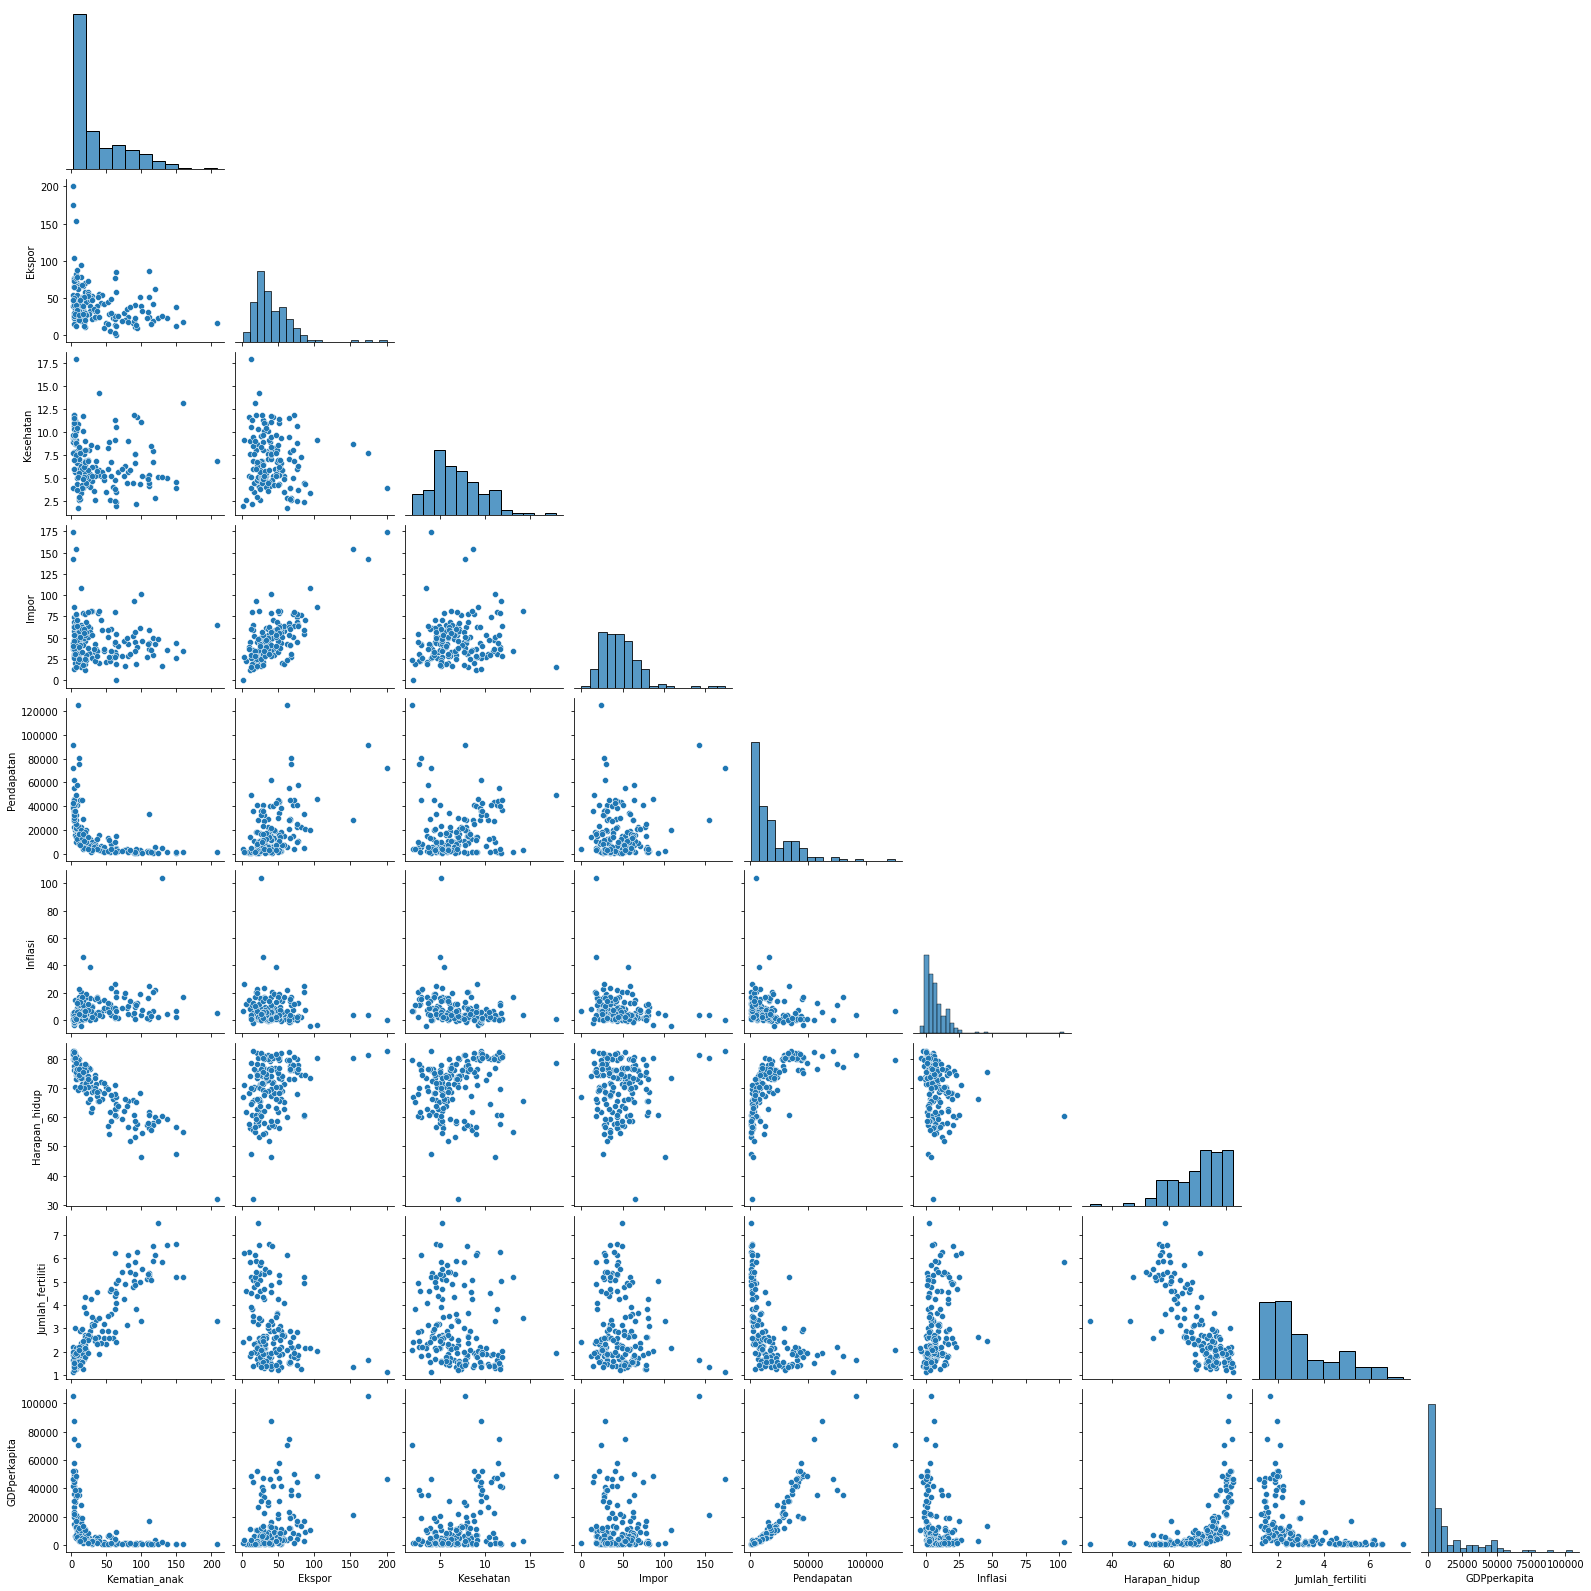

In [4]:
#2.2 Exploratory Data Analysis Part 1
sns.pairplot(df, corner=True)

2.3 Feature Selection

Disini kami melakukan pairplot untuk menganalisis keterkaitan antar variabel. Selanjutnya kami memilih variabel Kesehatan dan GDP perkapita. Hal tersebut karena menurut kami pengeluaran yang digunakan untuk kepentingan kesehatan sangat menunjukkan keadaan suatu negara tersebut, baik digunakan untuk pengobatan maupun pencegahan. Selain itu, satuan kedua variabel tersebut sama, yaitu perkapita.

In [45]:
#2.4 Data Cleaning

#missing value
df_final = df[['Negara', 'Kesehatan', 'GDPperkapita']]
df_final.info()
#no missing value detected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Negara        167 non-null    object 
 1   Kesehatan     167 non-null    float64
 2   GDPperkapita  167 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ KB


In [46]:
df_final[100:120]

,Negara,Kesehatan,GDPperkapita
100,Mauritius,6.00,8000
101,"Micronesia, Fed. Sts.",14.20,2860
102,Moldova,11.70,1630
103,Mongolia,5.44,2650
104,Montenegro,9.11,6680
105,Morocco,5.20,2830
106,Mozambique,5.21,419
107,Myanmar,1.97,988
108,Namibia,6.78,5190
109,Nepal,5.25,592


In [47]:
#outliers
Q1 = df[['Kesehatan', 'GDPperkapita']].quantile(.25)
Q3 = df[['Kesehatan', 'GDPperkapita']].quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

print(lower_bound)
print(upper_bound)

Kesehatan          -0.6
GDPperkapita   -17750.0
dtype: float64
Kesehatan          14.12
GDPperkapita    33130.00
dtype: float64


In [48]:
#outliers check
def get_lwr_upr_bnd(x):
  q1 = np.percentile(x, 25)
  q3 = np.percentile(x, 75)
  iqr = q3 - q1
  lwr_bnd = q1 - (iqr * 1.5)
  upr_bnd = q3 + (iqr * 1.5)
  return lwr_bnd, upr_bnd

def get_outliers_iqr(x):
  lwr_bnd, upr_bnd = get_lwr_upr_bnd(x)
  return x[np.where((x > upr_bnd) | (x < lwr_bnd))]

print('outliers variabel "Kesehatan" =', get_outliers_iqr(df_final['Kesehatan'].values))
print('outliers variabel "GDPperkapita" =',get_outliers_iqr(df_final['GDPperkapita'].values))

outliers variabel "Kesehatan" = [14.2 17.9]
outliers variabel "GDPperkapita" = [ 51900  46900  44400  35300  47400  58000  46200  40600  41800  41900
  48700  35800  44500  38500 105000  50300  33700  87800  70300  46600
  52100  74600  35000  38900  48400]


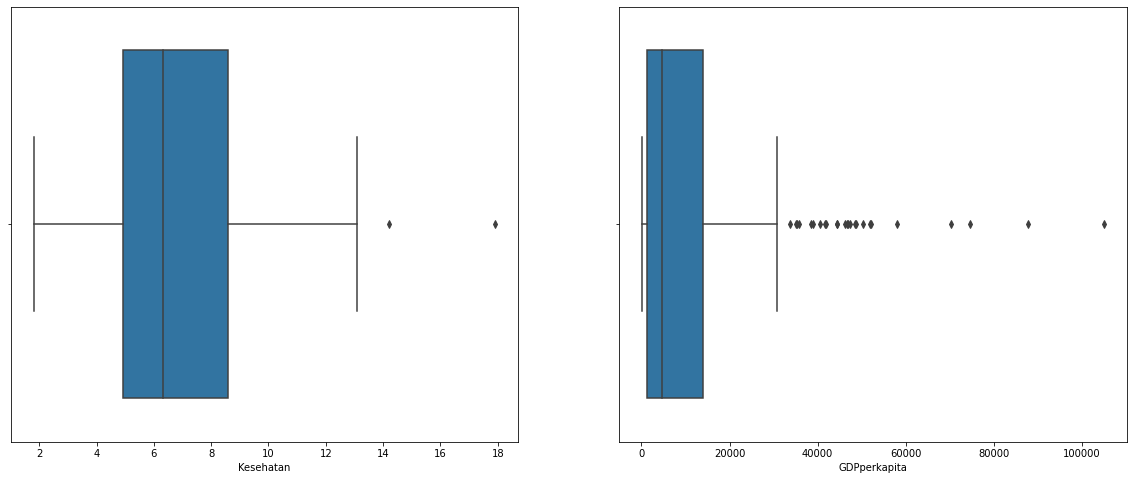

In [49]:
#outliers before handling
fig, ax = plt.subplots(figsize = (20, 8), nrows=1, ncols=2)
sns.boxplot(data = df_final, x = 'Kesehatan', ax = ax[0])
sns.boxplot(data = df_final, x = 'GDPperkapita', ax = ax[1])
plt.show()

In [50]:
#handling outliers
scipy.stats.mstats.winsorize(df_final['Kesehatan'], limits=[0.05, 0.05], inplace = True)
scipy.stats.mstats.winsorize(df_final['GDPperkapita'], limits=[0.05, 0.05], inplace = True)

masked_array(data=[  553,  4090,  4460,  3530, 12200, 10300,  3220, 48700,
                   46900,  5840, 28000, 20700,   758, 16000,  6030, 44400,
                    4340,   758,  2180,  1980,  4610,  6350, 11200, 35300,
                    6840,   575,   459,   786,  1310, 47400,  3310,   459,
                     897, 12900,  4560,  6250,   769,   459,  2740,  8200,
                    1220, 13500, 30800, 19800, 48700,  5450,  4660,  2600,
                    2990, 17100,   482, 14600,  3650, 46200, 40600,  8750,
                     562,  2960, 41800,  1310, 26900,  7370,  2830,   648,
                     547,  3040,   662, 13100, 41900,  1350,  3110,  6530,
                    4500, 48700, 30600, 35800,  4680, 44500,  3680,  9070,
                     967,  1490, 38500,   880,  1140, 11300,  8860,  1170,
                     459, 12100, 12000, 48700,  4540,   459,   459,  9070,
                    7100,   708, 21100,  1200,  8000,  2860,  1630,  2650,
                    6680,

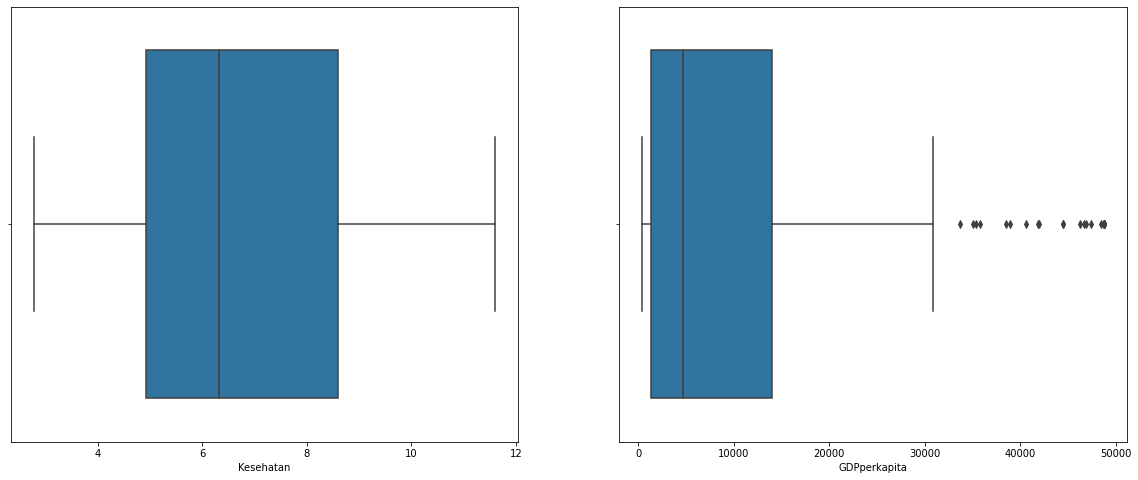

In [51]:
#outliers after handling
fig, ax = plt.subplots(figsize = (20, 8), nrows=1, ncols=2)
sns.boxplot(data = df_final, x = 'Kesehatan', ax = ax[0])
sns.boxplot(data = df_final, x = 'GDPperkapita', ax = ax[1])
plt.show()

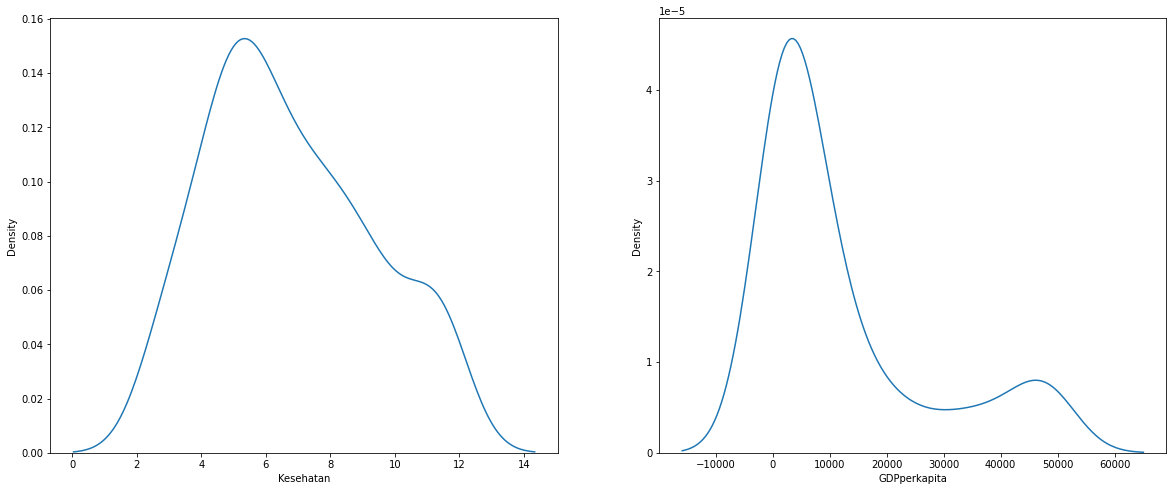

In [60]:
#2.5 Exploratory Data Analysis Part 2

#univariate analysis density plot
fig, ax = plt.subplots(figsize = (20, 8), nrows=1, ncols=2)
sns.kdeplot(data = df_final, x = 'Kesehatan', ax = ax[0])
sns.kdeplot(data = df_final, x = 'GDPperkapita', ax = ax[1])
plt.show()

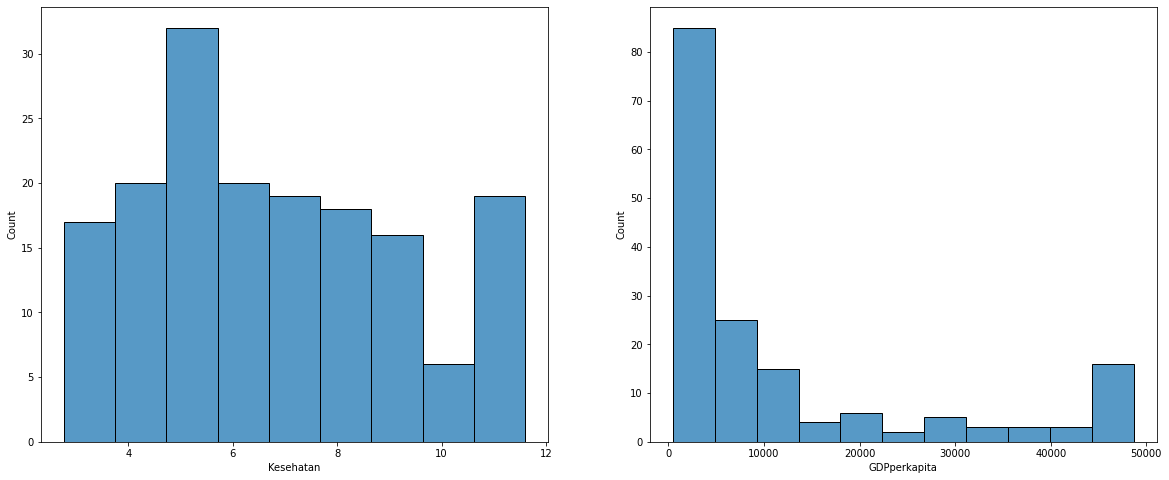

In [61]:
#univariate analysis density plot
fig, ax = plt.subplots(figsize = (20, 8), nrows=1, ncols=2)
sns.histplot(data = df_final, x = 'Kesehatan', ax = ax[0])
sns.histplot(data = df_final, x = 'GDPperkapita', ax = ax[1])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


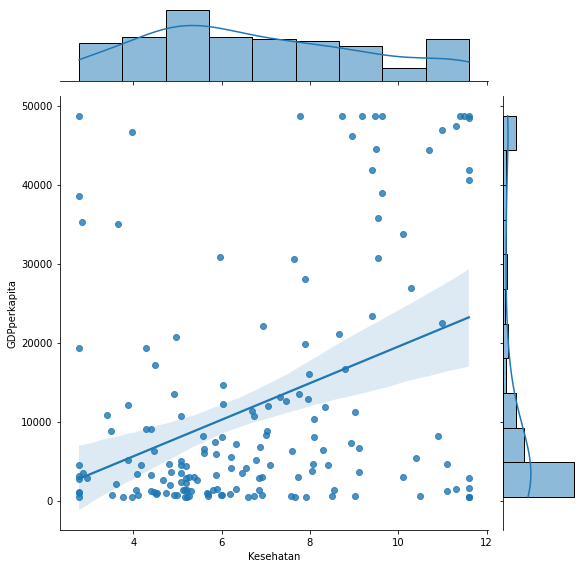

In [83]:
#bivariate analysis regression
sns.jointplot('Kesehatan', 'GDPperkapita', data = df_final, kind='reg', height = 8);
plt.show()

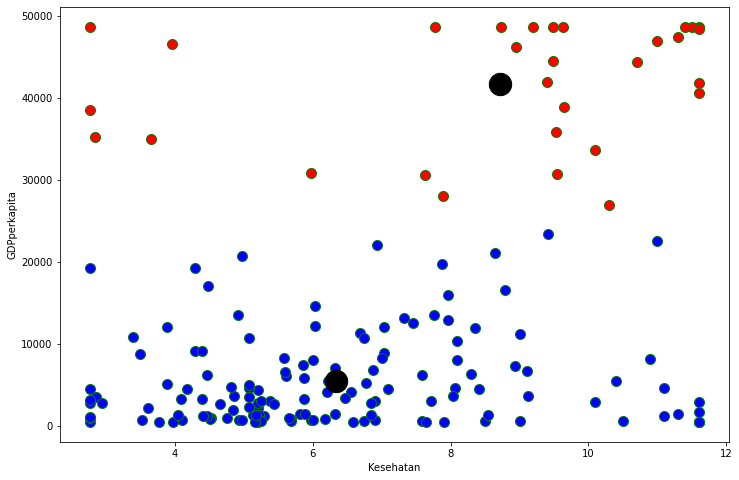

In [85]:
#3 Clustering

df_final2 = df_final[['Kesehatan', 'GDPperkapita']]

#kmeans
kmeans1 = KMeans(n_clusters = 2, random_state = 42).fit(df_final2)
labels1 = kmeans1.labels_

new_df_final = pd.DataFrame(data = df_final2, columns = ['Kesehatan', 'GDPperkapita'])
new_df_final['label_kmeans1'] = labels1

#n_cluster = 2 
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(new_df_final['Kesehatan'][new_df_final.label_kmeans1 == 0], new_df_final['GDPperkapita'][new_df_final.label_kmeans1 == 0], c = 'blue', s = 100, edgecolor = 'green')
plt.scatter(new_df_final['Kesehatan'][new_df_final.label_kmeans1 == 1], new_df_final['GDPperkapita'][new_df_final.label_kmeans1 == 1], c = 'red', s = 100, edgecolor = 'green')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 500)
plt.xlabel('Kesehatan')
plt.ylabel('GDPperkapita')
plt.show()

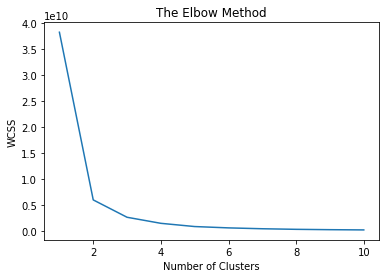

In [86]:
#elbow method, n_cluster = 2
wcss = []
for i in range(1, 11):
  kmeans =  KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(new_df_final)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

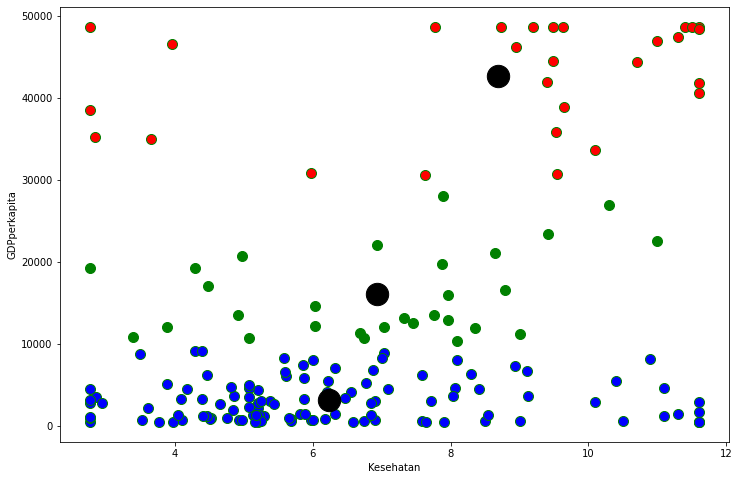

In [87]:
#kmeans2
kmeans2 = KMeans(n_clusters = 3, random_state = 42).fit(df_final2)
labels2 = kmeans2.labels_

new_df_final['label_kmeans2'] = labels2

#n_cluster = 3 
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(new_df_final['Kesehatan'][new_df_final.label_kmeans2 == 0], new_df_final['GDPperkapita'][new_df_final.label_kmeans2 == 0], c = 'blue', s = 100, edgecolor = 'green')
plt.scatter(new_df_final['Kesehatan'][new_df_final.label_kmeans2 == 1], new_df_final['GDPperkapita'][new_df_final.label_kmeans2 == 1], c = 'red', s = 100, edgecolor = 'green')
plt.scatter(new_df_final['Kesehatan'][new_df_final.label_kmeans2 == 2], new_df_final['GDPperkapita'][new_df_final.label_kmeans2 == 2], c = 'green', s = 100, edgecolor = 'green')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 500)
plt.xlabel('Kesehatan')
plt.ylabel('GDPperkapita')
plt.show()

In [89]:
#silhouette_score
from sklearn.metrics import silhouette_score

print('Nilai silhouette score clustering 1 =', silhouette_score(new_df_final, labels = labels1))
print('Nilai silhouette score clustering 2 =', silhouette_score(new_df_final, labels = labels2))

Nilai silhouette score clustering 1 = 0.8030977186129541
Nilai silhouette score clustering 2 = 0.6992948786824138


In [101]:
#4 Recommendation
GDP_rendah = df.GDPperkapita < 20000
df_final[(GDP_rendah)].sort_values(by=['GDPperkapita', 'Kesehatan'], ascending=True).head()

,Negara,Kesehatan,GDPperkapita
93,Madagascar,3.77,459
31,Central African Republic,3.98,459
112,Niger,5.16,459
106,Mozambique,5.21,459
94,Malawi,6.59,459


# kesimpulan

Berdasarkan clustering dengan GDP rendah, didapatkan 5 negara dengan nilai GDPperkapita dan nilai Kesehatan yang rendah. Disini kami merekomendasikan 2 negara dengan keadaan yang kurang lebih sama. Negara yang diberikan bantuan oleh HELP International adalah Madagascar dan Central African Republic. Kami memberikan 2 kandidat karena terbatasnya dana yang dimiliki oleh HELP International.